In [1]:
import math,pylab,read_srt
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import UnivariateSpline
from astropy.modeling import models, fitting
from scipy.optimize import curve_fit
from scipy.optimize import leastsq

# Part 1

In [2]:
file = np.genfromtxt("raw_offset_data.txt",comments="*",skip_header=1)

az = file[:,1]
el = file[:,2]
offset1, offset2 = file[:,3], file[:,4]
cfq = file[:,5]
spacing = file[:,6]
mode = file[:,7]
channel = file[:,8]
temp = file[:,9:-2]  # don't want the last 2 columns. Must mean over all the values. 

In [3]:
meanTemp  = []
for i in range(len(temp)):
    meanTemp.append(np.median(temp[i]))  # median? 
    
meanTemp

[27929.75,
 1279.4,
 1314.8,
 3168.85,
 1311.85,
 140.0,
 141.3,
 140.2,
 139.3,
 139.3,
 138.4,
 139.2,
 139.5,
 139.15,
 140.85000000000002,
 140.8,
 142.64999999999998,
 140.0,
 139.75,
 138.7,
 138.05,
 138.64999999999998,
 138.8,
 139.25,
 142.3,
 143.6,
 141.2,
 141.45,
 141.75,
 142.35000000000002,
 147.14999999999998,
 144.14999999999998,
 147.45,
 145.1,
 146.0,
 145.2,
 143.2,
 144.7,
 139.45,
 140.25,
 140.2,
 145.55,
 144.5,
 144.89999999999998,
 145.14999999999998,
 144.5,
 164.6,
 153.8,
 156.3,
 151.85000000000002,
 149.95,
 150.5,
 154.2,
 152.9,
 148.35000000000002,
 140.75,
 142.75,
 143.75,
 144.25,
 143.2,
 145.9,
 158.05,
 152.35000000000002,
 148.85000000000002,
 152.85000000000002,
 149.45,
 163.15,
 167.7,
 182.14999999999998,
 179.85,
 178.14999999999998,
 156.3,
 147.7,
 144.2,
 142.75,
 148.95,
 146.60000000000002,
 152.65,
 149.2,
 145.55,
 144.14999999999998,
 151.7,
 168.9,
 190.7,
 254.4,
 258.5,
 221.64999999999998,
 198.2,
 182.25,
 166.64999999999998,


In [4]:
# plt.figure(figsize=(12,8))
# plt.plot(el[6:],meanTemp[6:],'ko',markerfacecolor='none')
# plt.xlabel("Elevation $(^{\circ})$",fontsize=15)
# plt.ylabel("Average Temperature (K)",fontsize=15)
# plt.title("Average Antenna Temperature as a function of Elevation",fontsize=18)

Text(0.5, 1.0, 'Average Antenna Temperature as a function of Elevation')

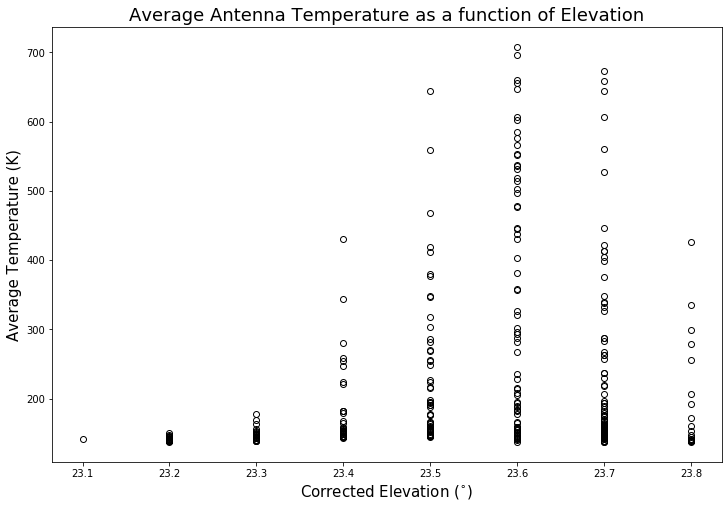

In [5]:
%matplotlib inline
plt.figure(figsize=(12,8))
plt.plot(el[6:]-offset2[6:],meanTemp[6:],'ko',markerfacecolor='none')
plt.xlabel("Corrected Elevation $(^{\circ})$",fontsize=15)
plt.ylabel("Average Temperature (K)",fontsize=15)
plt.title("Average Antenna Temperature as a function of Elevation",fontsize=18)

Text(0.5, 1.0, 'Average Antenna Temperature as a function of Elevation Offset')

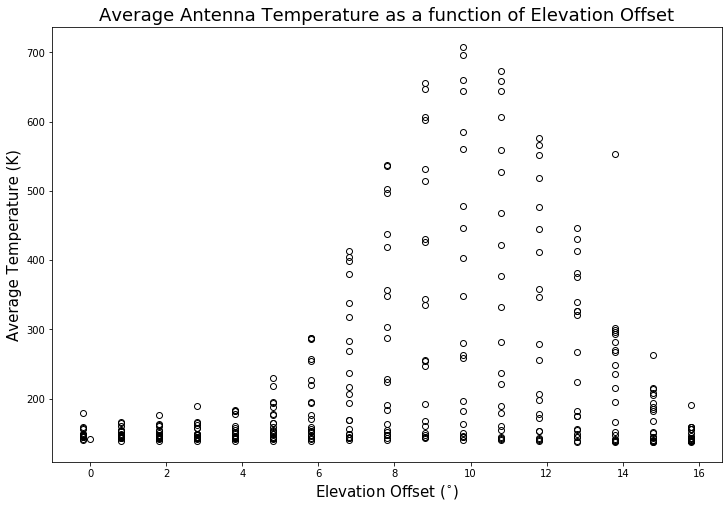

In [6]:
plt.figure(figsize=(12,8))
plt.plot(offset2[6:],meanTemp[6:],'ko',markerfacecolor='none')
plt.xlabel("Elevation Offset $(^{\circ})$",fontsize=15)
plt.ylabel("Average Temperature (K)",fontsize=15)
plt.title("Average Antenna Temperature as a function of Elevation Offset",fontsize=18)

In [7]:
#plt.scatter(offset1[6:],meanTemp[6:],s=100,facecolors='none',edgecolors='k')

In [8]:
# plt.figure(figsize=(12,8))
# plt.plot(az[6:],meanTemp[6:],'ko',markerfacecolor='none')
# plt.xlabel("Azimuth $(^{\circ})$",fontsize=15)
# plt.ylabel("Average Temperature (K)",fontsize=15)
# plt.title("Mean Average Antenna Temperature as a function of Azimuth",fontsize=18)

In [9]:
# plt.figure(figsize=(12,8))
# plt.plot(az[6:]+offset1[6:],meanTemp[6:],'ko',markerfacecolor='none')
# plt.xlabel("Corrected Azimuth $(^{\circ})$",fontsize=15)
# plt.ylabel("Average Temperature (K)",fontsize=15)
# plt.title("Average Antenna Temperature as a function of Azimuth",fontsize=18)

In [10]:
off = offset1[6:]
T = meanTemp[6:]
result = []
maxT = []

iteri = np.arange(-7,14)  # non-duplicate offsets

# for j in iteri:
#     for i in range(len(off)):
#         if (off[i]==j):
#             result.append(T[i])
#     maxT.append(max(result))  # these max are the closest to the sun. 
#     result = []

for j in iteri:
    for i in range(len(off)):
        if (off[i]==j):
            result.append(T[i])
    
    if j==8:
        result[np.argmax(result)] = 0
        print(result)
    if j == 13:
        result[-1], result[-2], result[-3], result[-4] = 0,0,0,0
        print(result)
    maxT.append(max(result))  # these max are the closest to the sun. 
    result = []

maxT

[146.6, 146.6, 147.4, 148.05, 151.55, 164.75, 193.75, 236.35, 287.85, 335.6, 348.85, 331.95, 278.3, 339.54999999999995, 0, 144.3, 140.1]
[146.55, 154.75, 144.4, 143.25, 144.7, 143.85000000000002, 141.8, 143.64999999999998, 147.14999999999998, 147.25, 144.10000000000002, 141.14999999999998, 139.7, 0, 0, 0, 0]


[142.64999999999998,
 147.45,
 164.6,
 182.14999999999998,
 258.5,
 281.1,
 402.9,
 478.65,
 585.25,
 659.9,
 708.0,
 695.75,
 644.55,
 560.0,
 446.1,
 348.85,
 262.65,
 197.05,
 163.85000000000002,
 144.9,
 154.75]

In [11]:
# uniques = np.arange(-7,14)
# result2 = []
# for x in uniques:
#     top = 0
#     for i in range(len(off)):
#         if (off[i] == x):
#             if (T[i] > top):
#                 top = T[i]
            
#     result2.append(top)

# result2 == maxT

array([575.19667333,   3.29950283,  -3.33794922, 134.52044213])

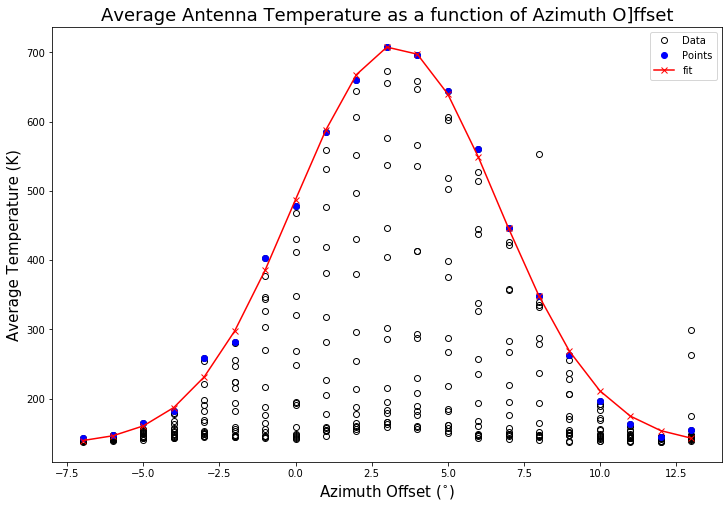

In [12]:
def gauss(xval, amp, cent1, sigma1, c):
    return amp*np.exp(-(xval-cent1)**2/(2*sigma1**2)) + c

popt, pcov = curve_fit(gauss, iteri, maxT, p0=[600, np.mean(T), np.std(T), 113])

plt.figure(figsize=(12,8))
plt.plot(off, T,'ko',markerfacecolor='none',label="Data")
plt.plot(iteri, maxT, "bo", label="Points")
plt.plot(iteri,gauss(iteri, *popt), "rx-",label='fit')
plt.xlabel("Azimuth Offset $(^{\circ})$",fontsize=15)
plt.ylabel("Average Temperature (K)",fontsize=15)
plt.title("Average Antenna Temperature as a function of Azimuth O]ffset",fontsize=18)
plt.legend()

popt

# errors are standard deviation. 

Beam Width: 9.322 degrees


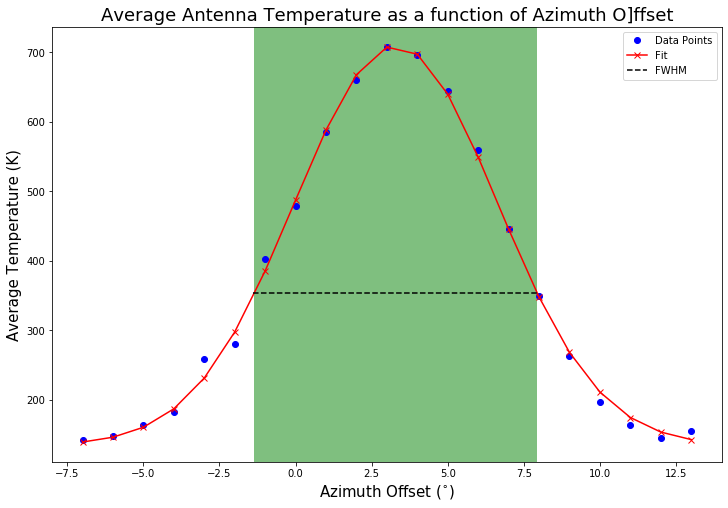

In [13]:
spline = UnivariateSpline(iteri, maxT-np.max(maxT)/2, s=0)
r1, r2 = spline.roots() # find the roots
FWHM = r2-r1

plt.figure(figsize=(12,8))
plt.plot(iteri, maxT, "bo", label="Data Points")
plt.plot(iteri,gauss(iteri, *popt), "rx-",label='Fit')
plt.axvspan(r1, r2, facecolor='g', alpha=0.5)
plt.axhline(y=max(maxT)/2, xmin=0.3, xmax=0.725, color = "black", linestyle="--",label="FWHM")
plt.xlabel("Azimuth Offset $(^{\circ})$",fontsize=15)
plt.ylabel("Average Temperature (K)",fontsize=15)
plt.title("Average Antenna Temperature as a function of Azimuth O]ffset",fontsize=18)
plt.legend()

print(r"Beam Width: {:.3f} degrees".format(FWHM))
# errors are the standard deviation. 

In [14]:
antTemp = max(maxT) - popt[-1]
lamb = 0.21  # 21cm
area = np.pi*(2.1)**2  # true SRT area
kb = 1.38E-23

sunSA = np.pi*(6.955E8)**2/(1.496E11)**2  # sun solid angle as seen from earth
beamSA = 1.133*((FWHM*(np.pi/180)))**2

Tb = (beamSA/sunSA)*(antTemp)
fluxDens = ((2*kb*beamSA*Tb)/lamb**2)/(10**4*10E-26)

print("Brightness Temperature: {:.3f} K".format(Tb))
print("Flux Density: {:.3f} sfu".format(fluxDens))  # since 1 polarization, energy is halved. 

Brightness Temperature: 253294.981 K
Flux Density: 4754.301 sfu


Text(0, 0.5, 'Temperatures')

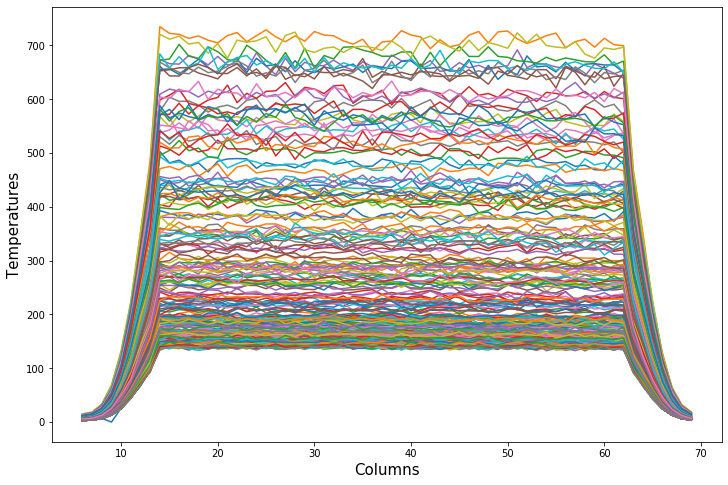

In [15]:
temp2 = temp[6:]  # remove first 6 rows. 
points = np.arange(6,len(temp2[0,:])+6)

plt.figure(figsize=(12,8))
for i in range(len(temp2)):
    plt.plot(points,temp2[i,:])

plt.xlabel("Columns",fontsize=15)
plt.ylabel("Temperatures",fontsize=15)

Text(0, 0.5, 'Temperatures')

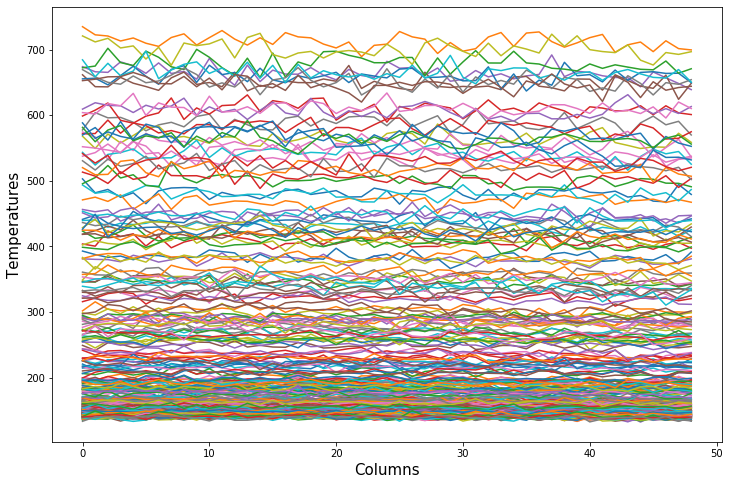

In [16]:
newT = temp[6:, 8:-7]
points = np.arange(0,len(newT[0,:]))

plt.figure(figsize=(12,8))
for i in range(len(newT)):
    plt.plot(points,newT[i,:])

plt.xlabel("Columns",fontsize=15)
plt.ylabel("Temperatures",fontsize=15)

In [17]:
meanTemp2  = []

for i in range(len(newT)):
    meanTemp2.append(np.mean(newT[i]))

result2 = []
maxT2 = []

iteri2 = np.arange(-7,14)  # non-duplicate offsets

for j in iteri2:
    for i in range(len(off)):
        if (off[i]==j):
            result2.append(meanTemp2[i])
    
    if j==8:
        result2[np.argmax(result2)] = 0
        #print(result2)
    if j == 13:
        result2[-1], result2[-2], result2[-3], result2[-4] = 0,0,0,0
        #print(result2)
    maxT2.append(max(result2))  # these max are the closest to the sun.
    result2 = []

In [18]:
stdMean  = []

for i in range(len(newT)):
    stdMean.append(np.std(newT[i]))

allStds = []

for j in iteri2:
    for i in range(len(off)):
        if (off[i]==j):
            allStds.append(stdMean[i])

maxStd = []

for i in range(len(maxT2)):
    ind = meanTemp2.index(maxT2[i])
    maxStd.append(allStds[ind])  # stds corresponding to max temperatures. 

array([578.4278928 ,   3.29773321,  -3.33669599, 135.54032672])

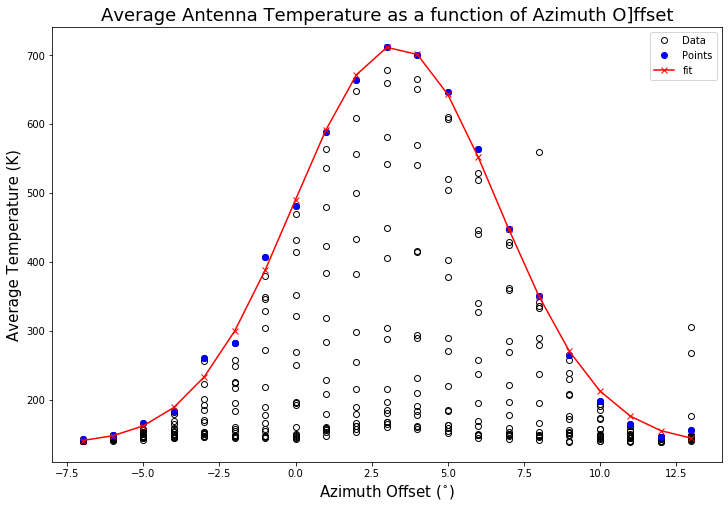

In [29]:
maxEl = 1#np.cos(43.2*np.pi/180)

popt2, pcov2 = curve_fit(gauss, iteri2*maxEl, maxT2, p0=[600, np.mean(newT), np.std(newT), 113])

plt.figure(figsize=(12,8))
plt.plot(off*maxEl, meanTemp2,'ko',markerfacecolor='none',label="Data")
plt.plot(iteri2*maxEl, maxT2, "bo", label="Points")
plt.plot(iteri2*maxEl,gauss(iteri2*maxEl, *popt2), "rx-",label='fit')
plt.xlabel("Azimuth Offset $(^{\circ})$",fontsize=15)
plt.ylabel("Average Temperature (K)",fontsize=15)
plt.title("Average Antenna Temperature as a function of Azimuth O]ffset",fontsize=18)
plt.legend()

popt2

Beam Width: 7.871 degrees
Beam Width via Gaussian Distribution: 7.791 degrees


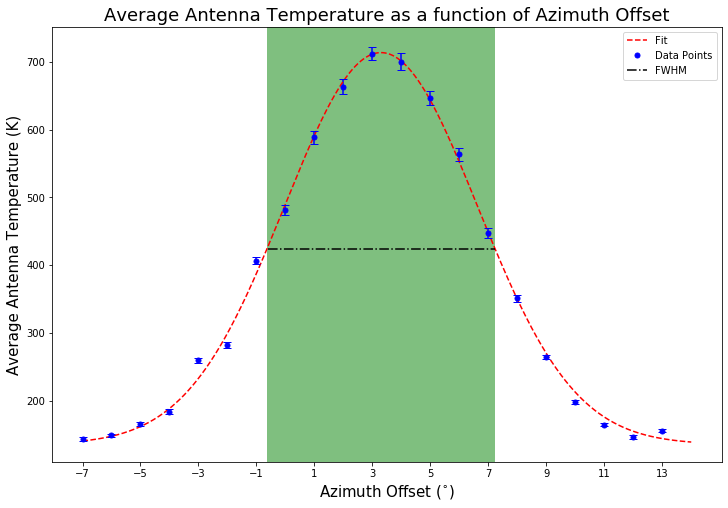

In [30]:
dataTemp = maxT2
iteri3 = np.linspace(-7,14,1000)  # non-duplicate offsets
model = gauss(iteri3*maxEl, *popt2)
halfMax = (max(dataTemp)+popt2[-1])/2
r1, r2 = 7.23323, -0.637786
FWHM2 = r1-r2
FWHMgauss = 2.335*abs(popt2[2])
xtick = [-7,-5,-3,-1,1,3,5,7,9,11,13]

plt.figure(figsize=(12,8))
plt.plot(iteri3*maxEl, model, "r--", markersize=1.5, label='Fit')
plt.plot(iteri2*maxEl, dataTemp, "bo", markersize=5, label="Data Points")
plt.errorbar(iteri2*maxEl, dataTemp,yerr = maxStd, capsize=4, fmt=' ', color='b')                              
plt.axvspan(r1, r2, facecolor='g', alpha=0.5)
plt.axhline(y=halfMax, xmin=0.323, xmax=0.662, color = "black", linestyle="-.",label="FWHM")
plt.xlabel("Azimuth Offset $(^{\circ})$",fontsize=15)
plt.xticks(ticks=xtick)
plt.ylabel("Average Antenna Temperature (K)",fontsize=15)
plt.title("Average Antenna Temperature as a function of Azimuth Offset",fontsize=18)
plt.legend()

print(r"Beam Width: {:.3f} degrees".format(FWHM2))
print(r"Beam Width via Gaussian Distribution: {:.3f} degrees".format(FWHMgauss))

In [21]:
antTemp2 = popt[0]*2 #(max(maxT2) - popt2[-1])*2  

beamSA2 = 1.133*((FWHMgauss*(np.pi/180)))**2

Tb2 = (beamSA2/sunSA)*(antTemp2)
fluxDens2 = ((2*kb*sunSA*Tb2)/(lamb**2))/((1E4*1E-26)) # same as switching sunSA for beamSA and Tb for Ta

print("Antenna Temperature: {:.3f} K".format(antTemp2))
print("Brightness Temperature: {:.3f} K".format(Tb2))
print("Flux Density: {:.3f} sfu".format(fluxDens2))  # since 1 polarization, energy is halved. 

Antenna Temperature: 1150.393 K
Brightness Temperature: 188614.566 K
Flux Density: 80.154 sfu
